#Simple Linear Regression

In this  book we will analyse the tv sales dataset using simple linear regression.

In this Notebook we will predict the  sale of TV based on thier Advertisement.

#Understanding the data
As we are performing Simple LR so feature must be one and predicted feature is also one.

We import data using pandas library.

In [18]:
import pandas as pd
import numpy as np
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


As we need only one feature so we will remove other features

In [37]:
df=df.loc[:,['TV','Sales']]

In [38]:
df.head()     # we can see one dependent variable and one independent variable

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [6]:
df.shape

(200, 2)

In [14]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [26]:
print('Check outlier for he TV feature')
Q1=74.37 #from df. describe
Q2=149.75  #from df.describe
Q3=218.82
IQR= Q3-Q1
IQR
upper_limit= Q3+1.5*(IQR)
print('Upper limit', upper_limit)
lower_limit= Q1-1.5*(IQR)
print('lower_limit',lower_limit)
print('max',df['TV'].max())
print('min',df['TV'].min())

print('''As we can conclude that out data max and mini values lies betweeen upper and lower limit
Hence we can say there is no outlier in our data''')



Check outlier for he TV feature
Upper limit 435.495
lower_limit -142.30499999999998
max 296.4
min 0.7
As we can conclude that out data max and mini values lies betweeen upper and lower limit
Hence we can say there is no outlier in our data


In [31]:
print('Check outlier for he Sales feature')
Q1=np.percentile(df['Sales'], 25)
Q2=np.percentile(df['Sales'], 50)
Q3=np.percentile(df['Sales'], 75)
IQR= Q3-Q1
print('Q1=',Q1,'Q2=',Q2,'Q3=',Q3)
print('IQR',IQR)

upper_limit= Q3+1.5*(IQR)
print('Upper limit', upper_limit)
lower_limit= Q1-1.5*(IQR)
print('lower_limit',lower_limit)
print('max',df['Sales'].max())
print('min',df['Sales'].min())

print('''As we can conclude that out data max and mini values lies betweeen upper and lower limit
Hence we can say there is no outlier in our data''')

Check outlier for he Sales feature
Q1= 10.375 Q2= 12.9 Q3= 17.4
IQR 7.024999999999999
Upper limit 27.937499999999996
lower_limit -0.16249999999999787
max 27.0
min 1.6
As we can conclude that out data max and mini values lies betweeen upper and lower limit
Hence we can say there is no outlier in our data


#Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

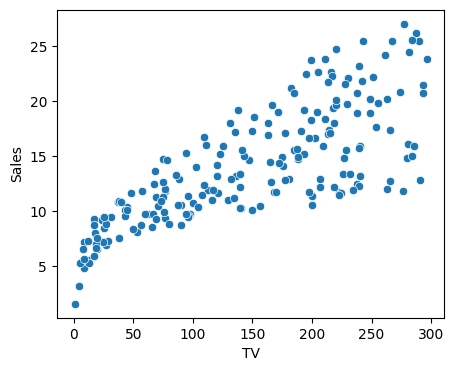

In [32]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x= 'TV', y ='Sales',markers= '*')

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [119]:
df['tv_sqrt']=np.sqrt(df['TV'])
df['sales_sqrt']=np.sqrt(df['Sales'])

In [120]:
x=df.loc[:,'tv_sqrt']
y=df.loc[:,'sales_sqrt']

In [121]:
x.ndim,y.ndim

(1, 1)

In [126]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42, test_size=0.33)

In [128]:
#Reshaping
x_train=x_train[:, np.newaxis]
x_test=x_test[:,np.newaxis]
y_train=y_train[:, np.newaxis]
y_test=y_test[:,np.newaxis]

<ipython-input-128-57bf3918e6db>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train=x_train[:, np.newaxis]
<ipython-input-128-57bf3918e6db>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test=x_test[:,np.newaxis]
<ipython-input-128-57bf3918e6db>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train=y_train[:, np.newaxis]
<ipython-input-128-57bf3918e6db>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test=y_test[:,np.newaxis]


In [129]:
x_train.ndim,y_train.ndim,x_test.ndim,y_test.ndim

(2, 2, 2, 2)

In [125]:
# from sklearn.preprocessing import PolynomialFeatures
# poly=PolynomialFeatures()
# x_train_poly=poly.fit_transform(x_train)
# x_test_poly=poly.fit(x_test)

In [133]:
print(lr.coef_)
print(lr.intercept_)

[[0.1466855]]
[2.01379003]


In [130]:
lr= LinearRegression()
lr


LinearRegression()

In [131]:
lr.fit(x_train,y_train)

LinearRegression()

In [132]:
y_pred=lr.predict(x_test)

In [137]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.15384150295670243

In [138]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6715412444611746

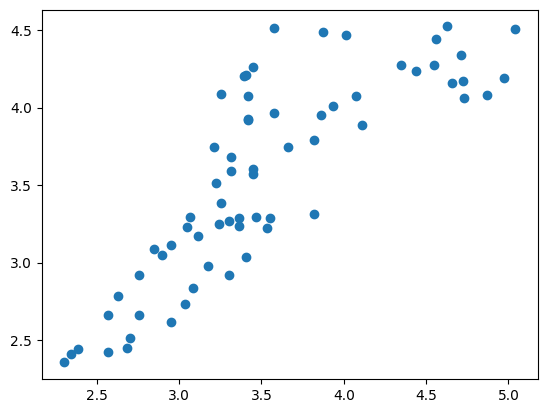

In [150]:
plt.scatter(y_test,y_pred)
plt.show()